In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
import seaborn as sns
import scipy

In [2]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [6]:
data = pd.read_csv("C:\\Users\\isaac\\Downloads\\archive\\big12basketball.csv")

In [7]:
data.head(30)

,id,year,rank,school,games,wins,losses,win_percentage,conference_wins,conference_losses,...,offensive_rebounds,total_rebounds,assists,steals,blocks,turnovers,personal_fouls,points,opponent_points,simple_rating
0,1,2021,1,Baylor,34,27,7,0.794,14,4,...,12.9,37.2,15.9,8.8,3.4,12.4,16.1,77.0,64.1,21.73
1,2,2021,2,Kansas,40,34,6,0.850,14,4,...,11.0,37.9,15.3,6.3,4.3,12.1,15.9,78.2,67.3,22.28
2,3,2021,3,Texas Tech,37,27,10,0.730,12,6,...,10.6,36.4,13.7,8.0,3.5,13.5,16.2,72.1,60.6,20.08
3,4,2021,4,Texas,34,22,12,0.647,10,8,...,10.4,33.3,13.2,7.7,3.4,11.6,17.9,68.8,60.6,17.01
4,5,2021,5,Oklahoma State,30,15,15,0.500,8,10,...,11.6,37.1,12.7,8.5,5.4,15.1,17.4,68.4,65.7,13.28
5,6,2021,6,TCU,34,21,13,0.618,8,10,...,13.0,39.0,13.6,6.4,4.1,14.5,15.5,68.5,64.9,13.72
6,7,2021,7,Iowa State,35,22,13,0.629,7,11,...,9.6,32.4,14.7,8.5,3.1,13.8,18.3,65.6,62.5,12.38
7,8,2021,8,Oklahoma,35,19,16,0.543,7,11,...,7.7,31.8,14.0,7.4,1.9,14.7,15.5,69.1,65.0,14.12
8,9,2021,9,Kansas State,31,14,17,0.452,6,12,...,8.9,33.2,12.5,7.3,1.6,11.5,17.1,69.0,67.5,10.61
9,10,2021,10,West Virginia,33,16,17,0.485,4,14,...,10.8,32.2,10.5,7.8,4.5,12.4,17.4,68.5,69.0,10.23


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,290.0,145.500000,83.860002,1.000,73.25000,145.500,217.75000,290.000
year,290.0,2007.931034,7.440333,1996.000,2002.00000,2008.000,2014.00000,2021.000
rank,290.0,6.120690,3.286112,1.000,3.00000,6.000,9.00000,12.000
games,290.0,32.555172,3.045001,17.000,31.00000,33.000,34.00000,40.000
wins,290.0,19.810345,6.417582,2.000,15.00000,20.000,24.00000,37.000
losses,290.0,12.744828,4.467149,2.000,10.00000,13.000,16.00000,24.000
win_percentage,290.0,0.599262,0.158858,0.083,0.48500,0.613,0.70600,0.944
conference_wins,290.0,8.365517,3.626725,0.000,6.00000,9.000,11.00000,17.000
conference_losses,290.0,8.365517,3.650499,0.000,6.00000,9.000,11.00000,18.000
home_wins,242.0,12.892562,2.954149,2.000,11.00000,13.000,15.00000,19.000


<AxesSubplot:>

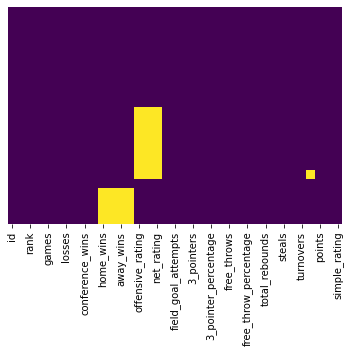

In [9]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [10]:
# data.drop(['home_wins','home_losses', 'away_wins', 'away_losses', 'defensive_rating','net_rating',
#           'offensive_rating', 'personal_fouls'], axis = 1, inplace=True)


<AxesSubplot:>

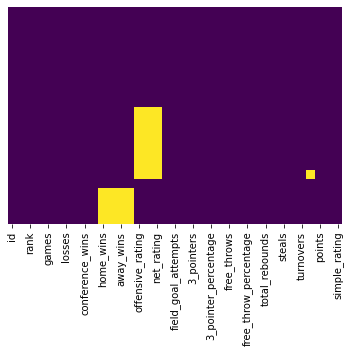

In [11]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [12]:
print('columns with null values:', data.isnull().sum())

columns with null values: id                                  0
year                                0
rank                                0
school                              0
games                               0
wins                                0
losses                              0
win_percentage                      0
conference_wins                     0
conference_losses                   0
home_wins                          48
home_losses                        48
away_wins                          48
away_losses                        48
offensive_rating                   96
defensive_rating                   96
net_rating                         96
field_goals                         0
field_goal_attempts                 0
field_goal_percentage               0
3_pointers                          0
3_pointer_attempts                  0
3_pointer_percentage                0
effective_field_goal_percentage     0
free_throws                         0
free_throw_attempts     

<AxesSubplot:>

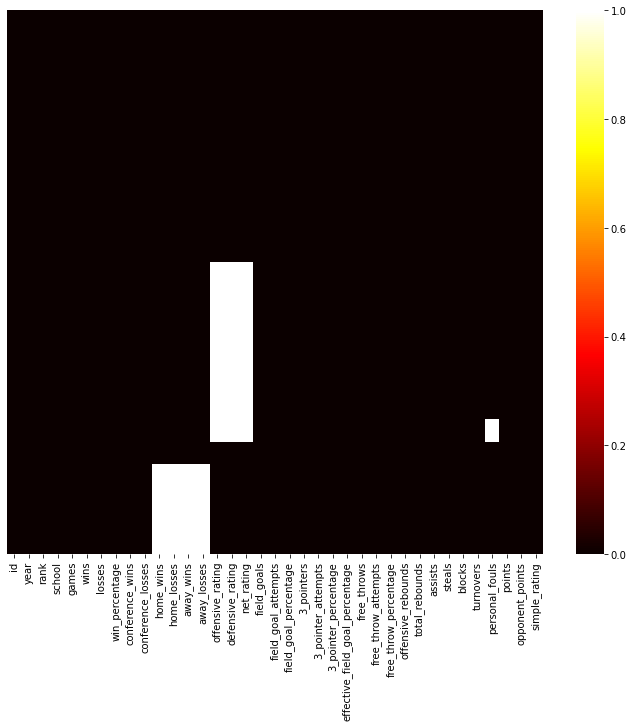

In [13]:
plt.subplots(figsize = (12,10))
sns.heatmap(data.isnull(), yticklabels=False, cbar=True, cmap='hot')

In [14]:
label = LabelEncoder()

In [22]:
for dataset in data:
    data['home_wins'].fillna(data['home_wins'].mean(), inplace = True)
    data['home_losses'].fillna(data['home_losses'].mean(), inplace = True)
    data['away_wins'].fillna(data['away_wins'].mean(), inplace = True)
    data['away_losses'].fillna(data['away_losses'].mean(), inplace = True)
    data['offensive_rating'].fillna(data['offensive_rating'].mean(), inplace = True)
    data['defensive_rating'].fillna(data['defensive_rating'].mean(), inplace = True)
    data['net_rating'].fillna(data['net_rating'].mean(), inplace = True)
    data['personal_fouls'].fillna(data['personal_fouls'].mean(), inplace = True)

<AxesSubplot:>

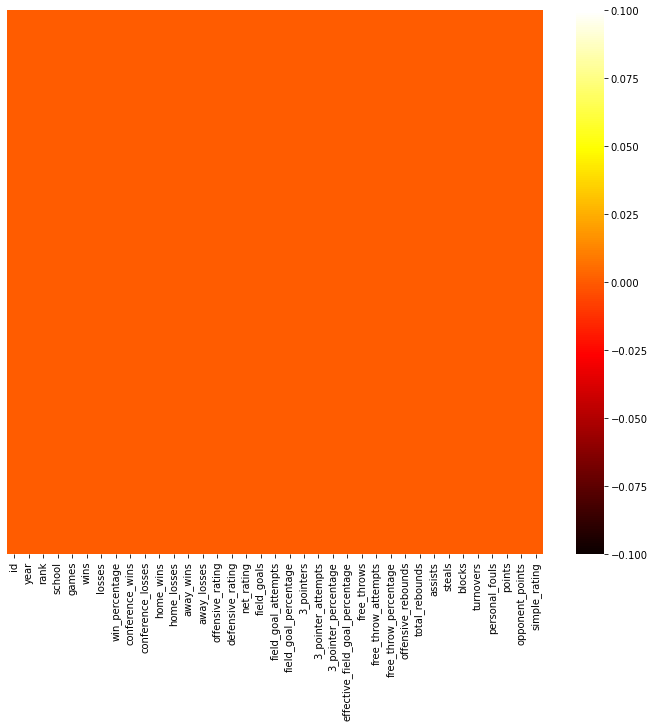

In [29]:
plt.subplots(figsize =(12,10))
sns.heatmap(data.isnull(), yticklabels= False, cbar= True, cmap='hot')

In [26]:
print('columns with null values:', data.isnull().sum())

columns with null values: id                                 0
year                               0
rank                               0
school                             0
games                              0
wins                               0
losses                             0
win_percentage                     0
conference_wins                    0
conference_losses                  0
home_wins                          0
home_losses                        0
away_wins                          0
away_losses                        0
offensive_rating                   0
defensive_rating                   0
net_rating                         0
field_goals                        0
field_goal_attempts                0
field_goal_percentage              0
3_pointers                         0
3_pointer_attempts                 0
3_pointer_percentage               0
effective_field_goal_percentage    0
free_throws                        0
free_throw_attempts                0
free_throw_p

In [58]:
from sklearn import feature_selection
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, precision_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor

In [59]:
X = data.drop(columns= ['win_percentage','school'], axis = 1)
y = data['win_percentage']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [60]:
rf = RandomForestRegressor(n_estimators=100)

In [61]:
rf

RandomForestRegressor()

In [62]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [63]:
pred_rand = rf.predict(X_test)

In [64]:
print(f'The mean abs percentage is {mean_absolute_percentage_error(y_test,pred_rand)}')
print(f'The mean abs err {mean_absolute_error(y_test,pred_rand)}')


The mean abs percentage is 0.029437657641518643
The mean abs err 0.01370505747126439


In [65]:
dt = DecisionTreeRegressor()

In [66]:
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [67]:
pred_dt = dt.predict(X_test)

In [68]:
print(f'The mean abs percentage is {mean_absolute_percentage_error(y_test,pred_dt)}')
print(f'The mean abs err {mean_absolute_error(y_test,pred_dt)}')


The mean abs percentage is 0.03791746587958274
The mean abs err 0.01764367816091954


In [70]:
GBC = GradientBoostingRegressor(n_estimators=100)

In [72]:
GBC.fit(X_train,y_train)

GradientBoostingRegressor()

In [75]:
pred_GBC = GBC.predict(X_test)

In [76]:
print(f'The mean abs percentage is {mean_absolute_percentage_error(y_test,pred_GBC)}')
print(f'The mean abs err {mean_absolute_error(y_test,pred_GBC)}')

The mean abs percentage is 0.02301345433751523
The mean abs err 0.008929752336096844
